# Plotting workspace showcasing our distributed algorithm against distributed hill climbing.

In [147]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc

from matplotlib import style
from matplotlib.lines import Line2D

import pickle as pkl

plt.rcParams['font.size'] = '16'


In [226]:

def trajectory(p,axis):
    N_sen = p.shape[1]
    for i in range(N_sen):
        axis.scatter(p[:,i,0],p[:,i,1],s=4)
        
def plot_pq(p_trial,q_trial,axis):
        trajectory(p_trial,axis)
        axis.scatter(q_trial[0,0],q_trial[0,1],marker = '*',s=200,edgecolor='r',facecolor='w')

def plot_trial_grid(p,q):
    
    trials = np.random.choice(np.arange(len(p)),size=3*3,replace=False)

    fig, axs = plt.subplots(3, 3,sharex='all',sharey='all',dpi=200)
    axs = axs.flatten()
    for i,trial in enumerate(trials):
        plot_pq(p[trial],q[trial],axs[i])
    fig.tight_layout()
    return fig,axs

def plot_showcase(p,q):
    ft,axs = plot_trial_grid(p,q)
 
    fm = plt.figure(dpi=200)
    p_mean = np.mean(p,axis=0)
    q_mean = np.mean(q,axis=0)
    plot_pq(p_mean,q_mean,plt.gca())
    
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Sensor',
                              markerfacecolor='g', markersize=10),
                       Line2D([], [], marker='*',linestyle='None', color='r', label='Source',
                              markerfacecolor='w', markersize=10)]
    plt.legend(handles=legend_elements)
    return ft,fm

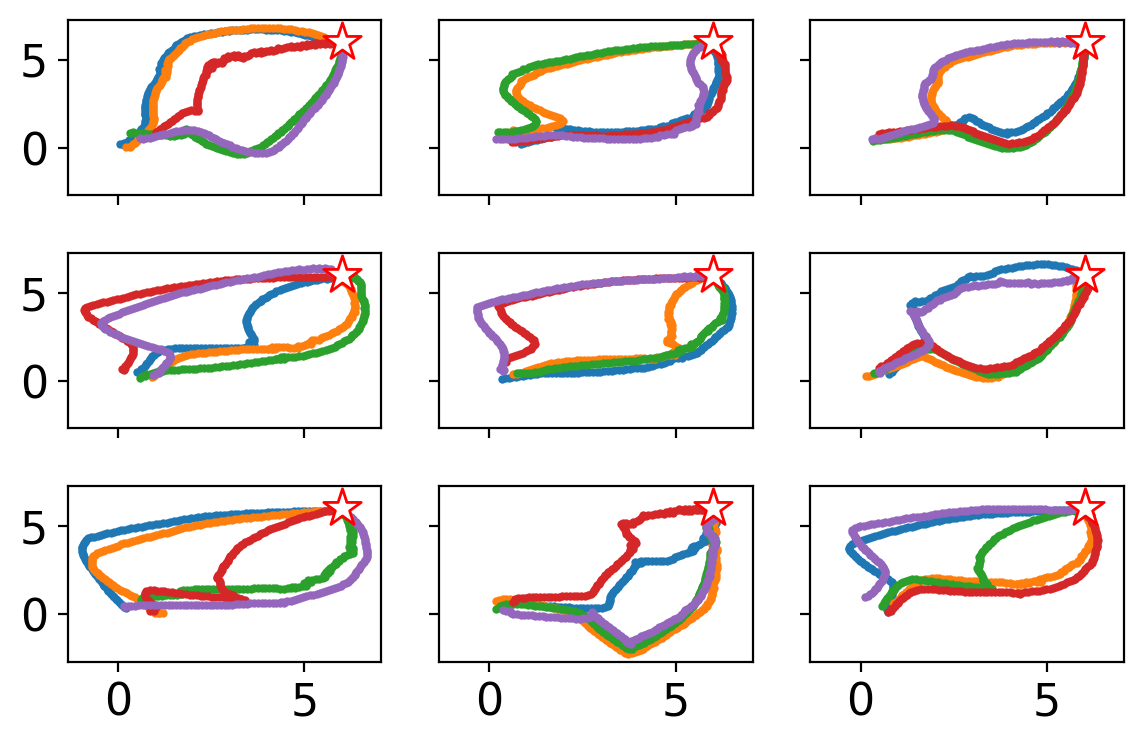

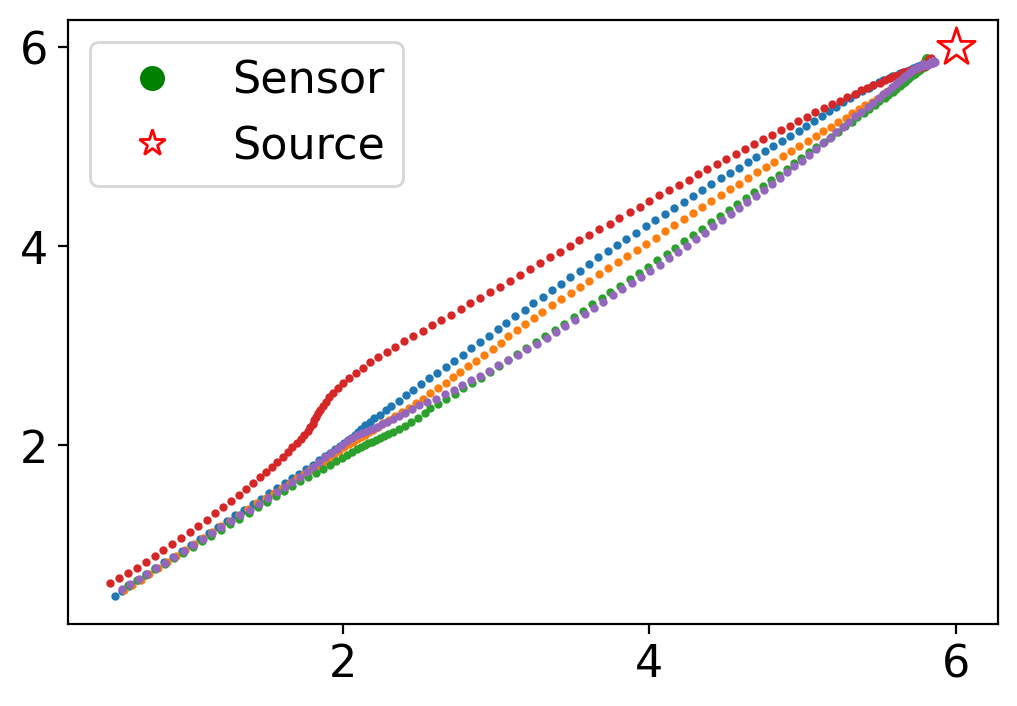

In [227]:
N_sen = 5
# Load data
with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
    dfim = pkl.load(file)

dfim = dfim['Coord.+Consensus Est.']

# Showcase behavioral difference
p = dfim['p']
q = dfim['q']
ft,fm=plot_showcase(p,q)
ft.savefig('Distributed-FIM-trials.png')
fm.savefig('Distributed-FIM-mean.png')

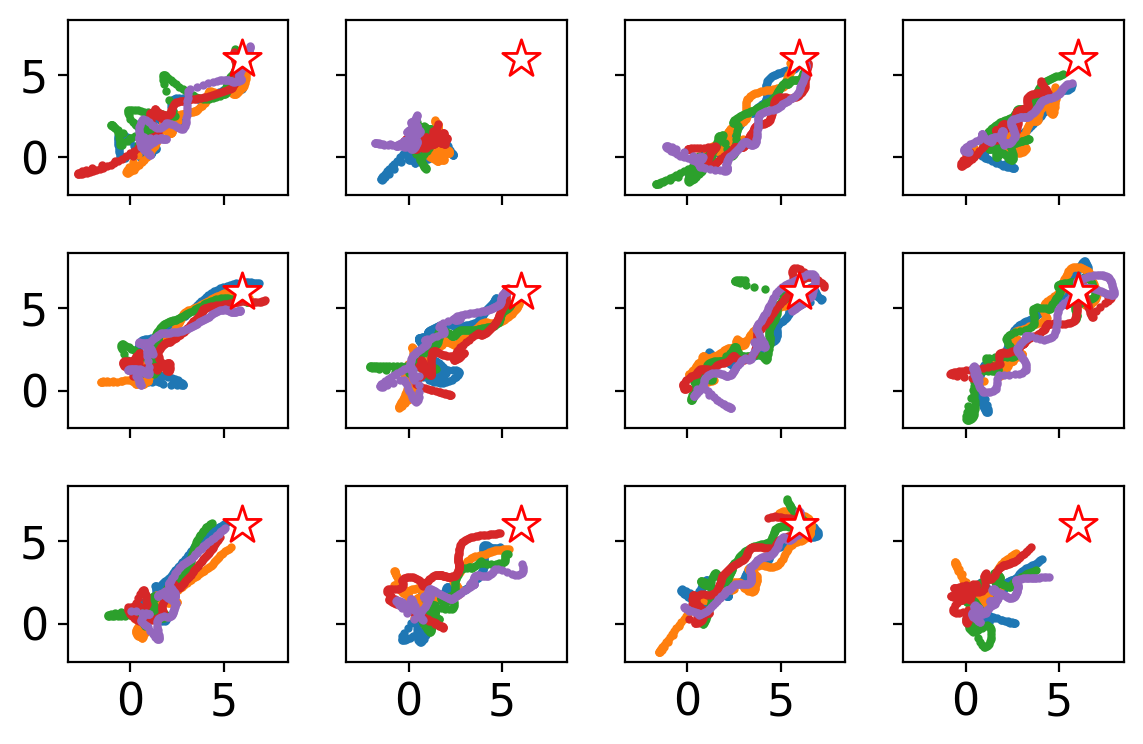

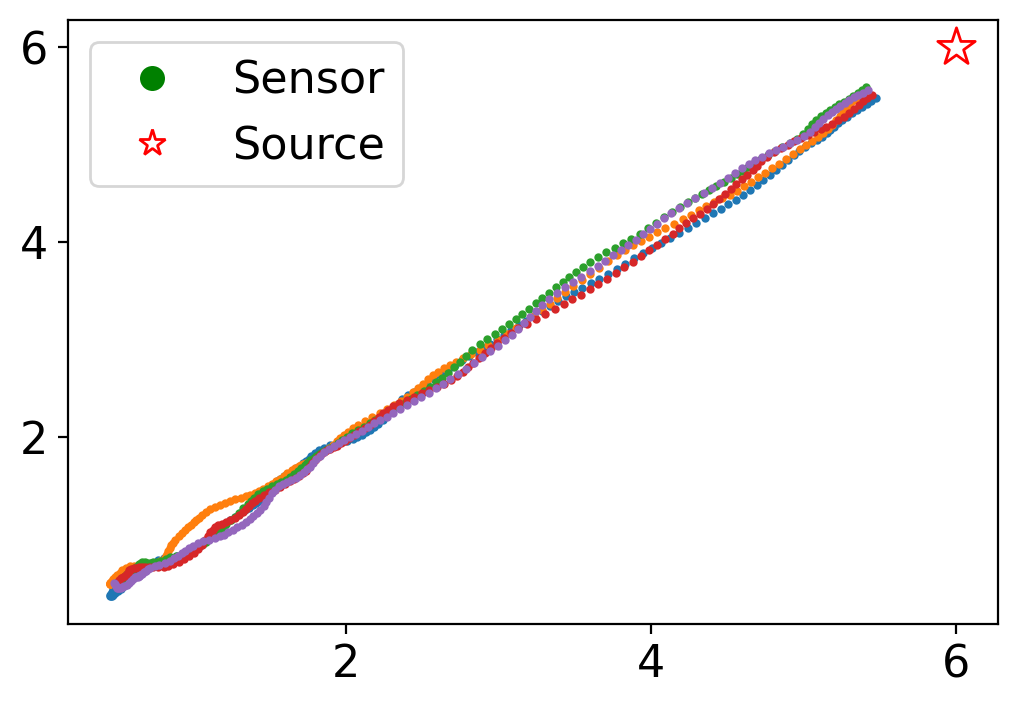

In [225]:
N_sen = 5
with open('Naomi-Distributed-{}Senor.pkl'.format(N_sen),'rb') as file:
    dnao = pkl.load(file)

p = dnao['p']
q = dnao['q']
ft,fm=plot_showcase(p,q)
ft.savefig('Naomi_Distributed_trials.png')
fm.savefig('Naomi_Distributed_mean.png')

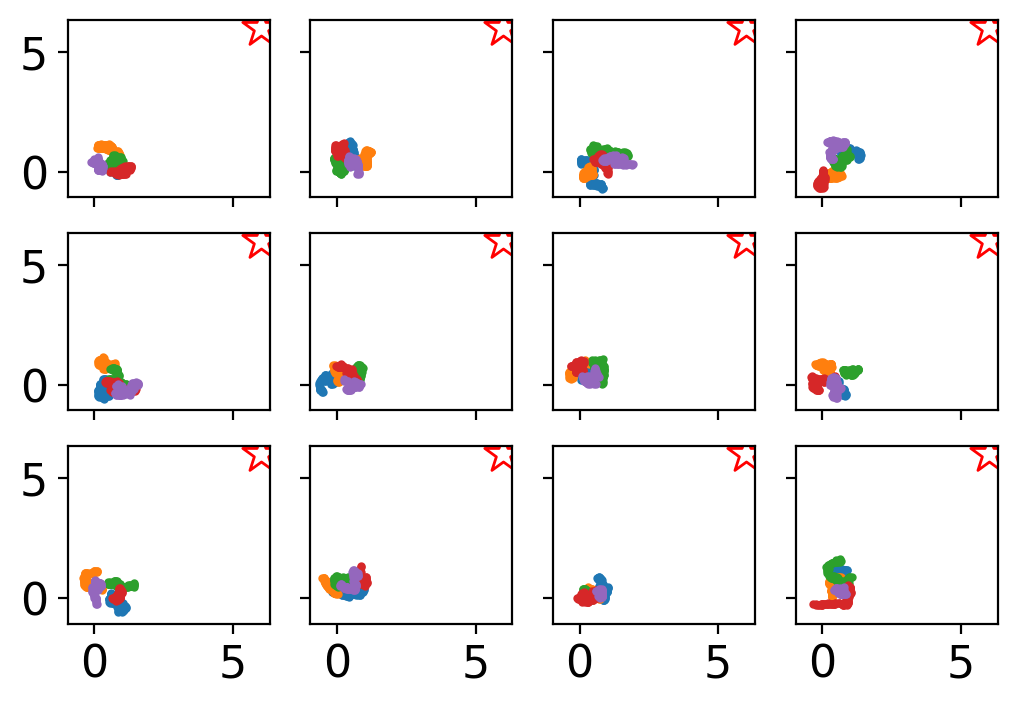

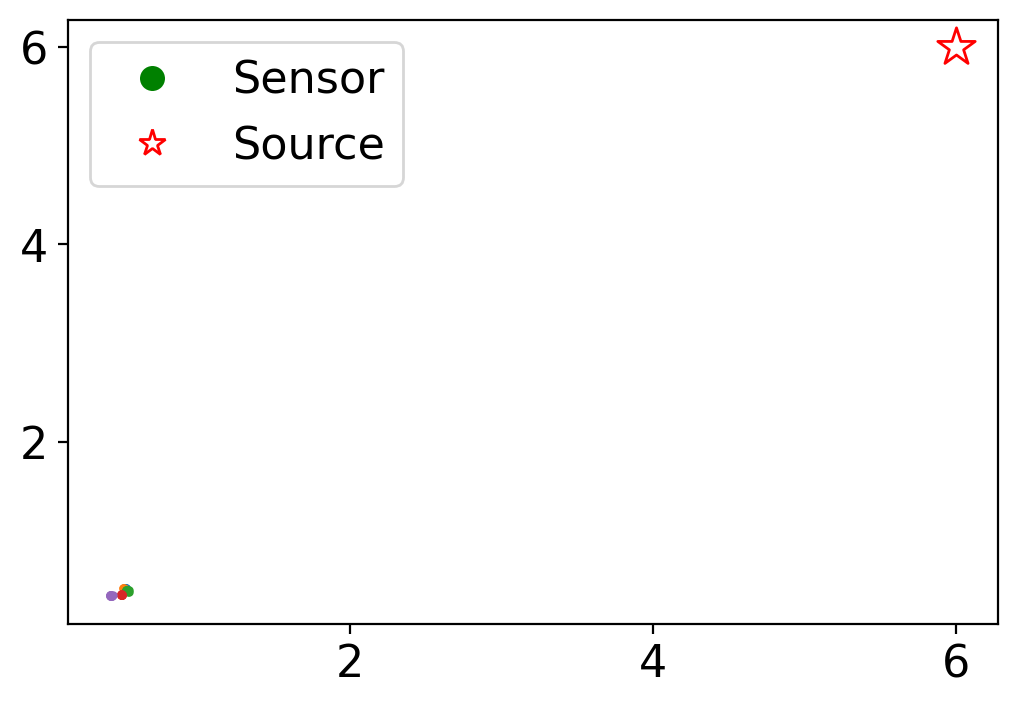

In [207]:
N_sen = 5
with open('Moore-Distributed-{}Senor.pkl'.format(N_sen),'rb') as file:
    dmoore = pkl.load(file)

p = dmoore['p']
q = dmoore['q']
ft,fm=plot_showcase(p,q)
ft.savefig('Moore_Distributed_trials.png')
fm.savefig('Moore_Distributed_mean.png')

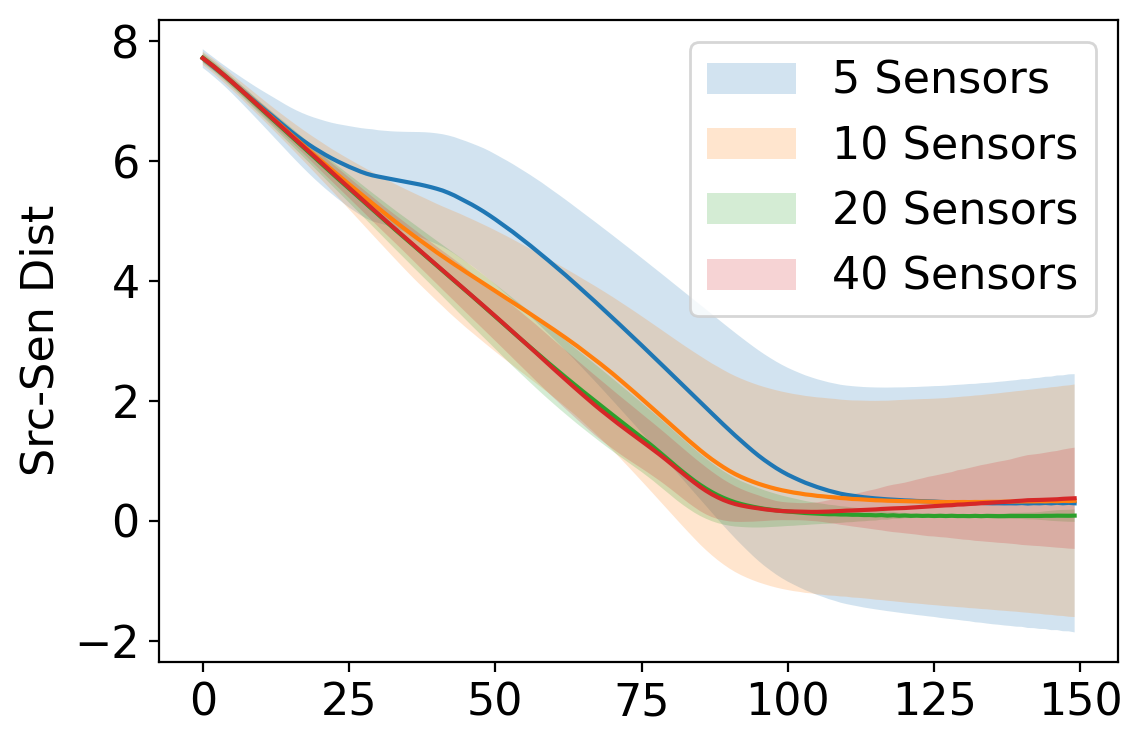

In [218]:
'''Plotting'''  
fig = plt.figure(dpi=200)
for N_sen in [5,10,20,40]:
    with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
        d = pkl.load(file)
    
    d = d['Coord.+Consensus Est.']


    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    ave_median_dist = np.mean(np.median(dist,axis=-1),axis=0)
    std_median_dist = np.std(np.median(dist,axis=-1),axis=0)
    N_iter=len(ave_median_dist)

    x = np.arange(N_iter)

#     plt.errorbar(x,ave_median_dist,yerr=std_median_dist,errorevery=10,label='{} Sensors'.format(N_sen))
    plt.plot(x,ave_median_dist)
    plt.fill_between(x,ave_median_dist+std_median_dist,ave_median_dist-std_median_dist,label='{} Sensors'.format(N_sen),alpha=0.2)
plt.legend()
plt.ylabel('Src-Sen Dist')

plt.tight_layout()
fig.savefig("DFIMSensorDist.png".format())
plt.show()

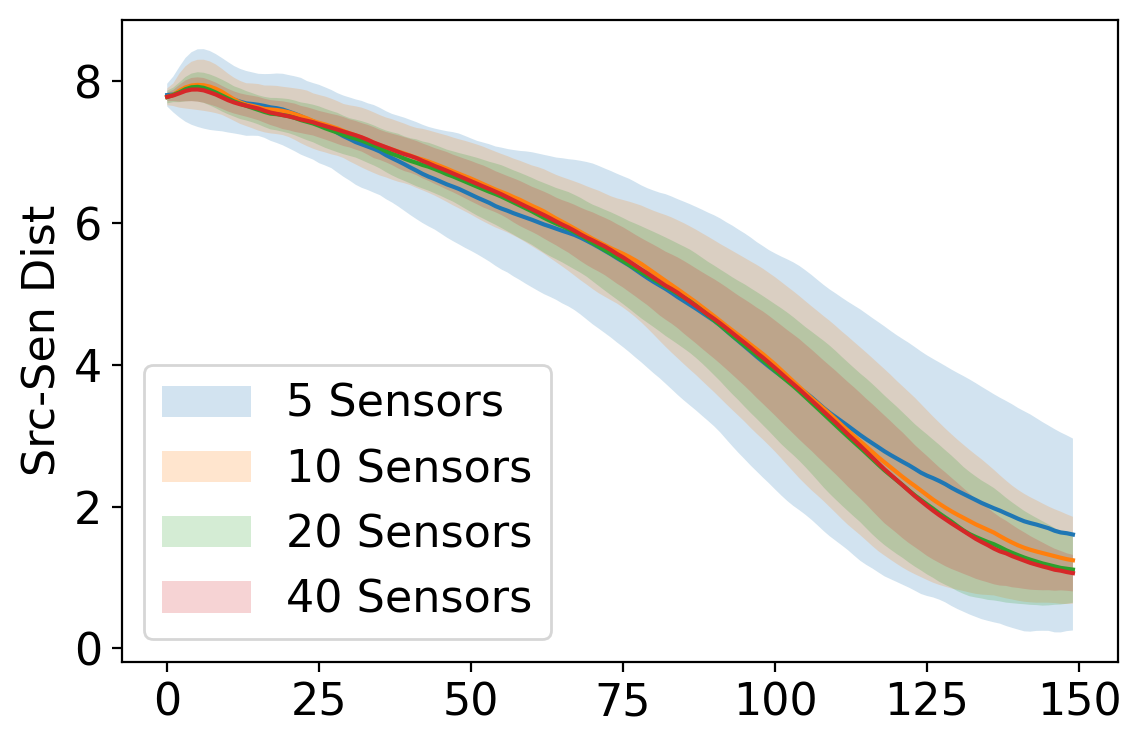

In [222]:
'''Plotting'''  
fig = plt.figure(dpi=200)
for N_sen in [5,10,20,40]:
    with open('Naomi-Distributed-{}Senor.pkl'.format(N_sen),'rb') as file:
        d = pkl.load(file)


    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    ave_median_dist = np.mean(np.median(dist,axis=-1),axis=0)
    std_median_dist = np.std(np.median(dist,axis=-1),axis=0)
    N_iter=len(ave_median_dist)

    x = np.arange(N_iter)

#     plt.errorbar(x,ave_median_dist,yerr=std_median_dist,errorevery=10,label='{} Sensors'.format(N_sen))
    plt.plot(x,ave_median_dist)
    plt.fill_between(x,ave_median_dist+std_median_dist,ave_median_dist-std_median_dist,label='{} Sensors'.format(N_sen),alpha=0.2)
plt.legend()
plt.ylabel('Src-Sen Dist')

plt.tight_layout()
fig.savefig("DNaomiSensorDist.png".format())
plt.show()